# Dynamic Momentum Index

https://www.motivewave.com/studies/dynamic_momentum_index.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,38.722500,39.712502,38.557499,39.480000,38.047047,148158800
2019-01-03 00:00:00-05:00,35.994999,36.430000,35.500000,35.547501,34.257286,365248800
2019-01-04 00:00:00-05:00,36.132500,37.137501,35.950001,37.064999,35.719700,234428400
2019-01-07 00:00:00-05:00,37.174999,37.207500,36.474998,36.982498,35.640194,219111200
2019-01-08 00:00:00-05:00,37.389999,37.955002,37.130001,37.687500,36.319607,164101200


In [3]:
df.index = pd.Index(df.index.date, name="Date")

In [4]:
high = df['High']
low = df['Low']
close = df['Adj Close']

n = 10  # DMI period

positive = high - high.shift(1)
negative = low.shift(1) - low
positive[positive < 0] = 0
negative[negative < 0] = 0
sum_pos = positive.rolling(window=n).sum()
sum_neg = negative.rolling(window=n).sum()
df['DMI'] = 100 * (sum_pos / (sum_pos + sum_neg))

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,DMI
Date,,,,,,,
2019-01-16,38.270000,38.970001,38.250000,38.735001,37.329090,122278800,48.031512
2019-01-17,38.549999,39.415001,38.314999,38.965000,37.550739,119284800,86.906835
2019-01-18,39.375000,39.470001,38.994999,39.205002,37.782032,135004000,84.610249
2019-01-22,39.102501,39.182499,38.154999,38.325001,36.933971,121576000,68.541222
2019-01-23,38.537498,38.785000,37.924999,38.480000,37.083336,92522400,58.653250


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,DMI
Date,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517097,48478800,89.930611
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896332,93121200,91.846342
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000,97.531963
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400,84.857809
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600,81.144436


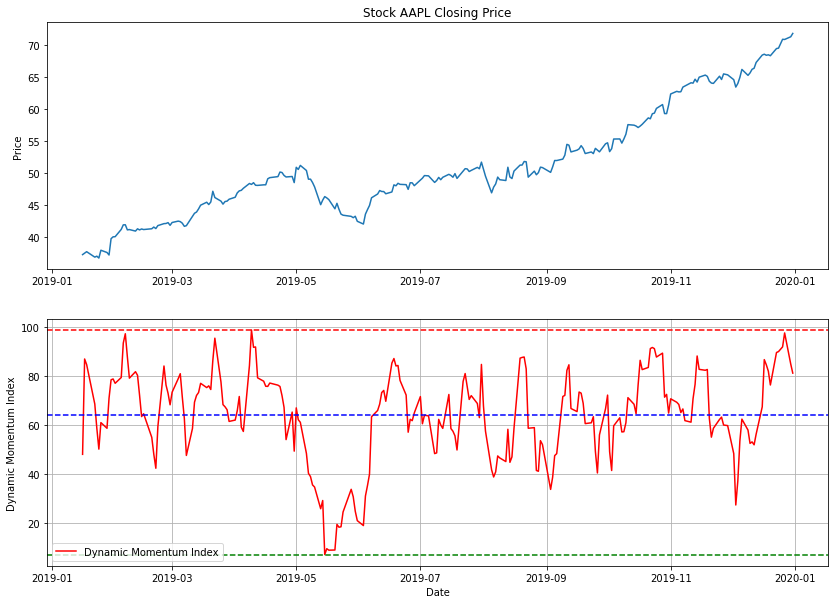

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index', color='red')
ax2.axhline(y=df['DMI'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['DMI'].min(), color='green', linestyle='--')
ax2.axhline(y=df['DMI'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Dynamic Momentum Index')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

Text(0.5, 0, 'Date')

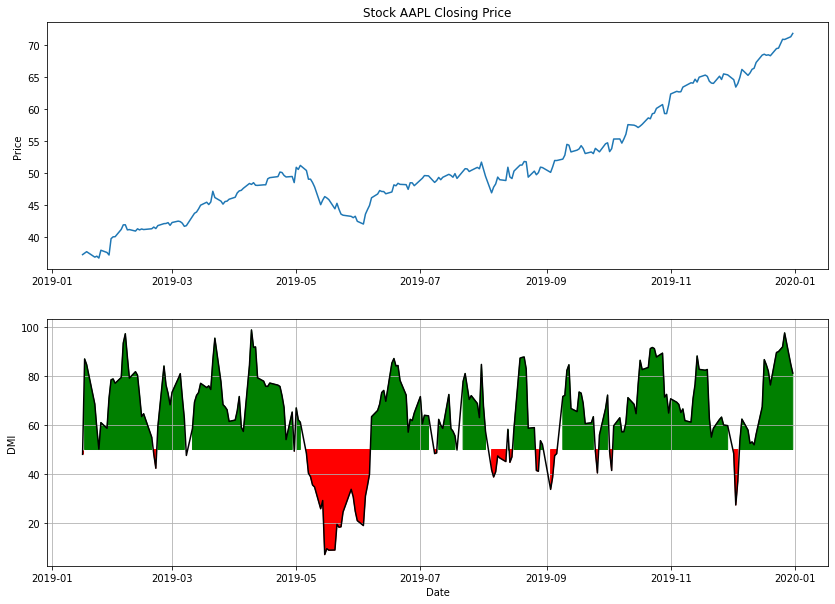

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index', color='k')
ax2.fill_between(df.index, y1=df['DMI'], y2=50, where=df['DMI']>50, color='green')
ax2.fill_between(df.index, y1=df['DMI'], y2=50, where=df['DMI']<50, color='red')
ax2.grid()
ax2.set_ylabel('DMI')
ax2.set_xlabel('Date')

## Candlestick with Dynamic Momentum Index

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DMI,VolumePositive
0,737075.0,38.270000,38.970001,38.250000,38.735001,37.329090,122278800,48.031512,False
1,737076.0,38.549999,39.415001,38.314999,38.965000,37.550739,119284800,86.906835,False
2,737077.0,39.375000,39.470001,38.994999,39.205002,37.782032,135004000,84.610249,False
3,737081.0,39.102501,39.182499,38.154999,38.325001,36.933971,121576000,68.541222,False
4,737082.0,38.537498,38.785000,37.924999,38.480000,37.083336,92522400,58.653250,False


Text(0.5, 0, 'Date')

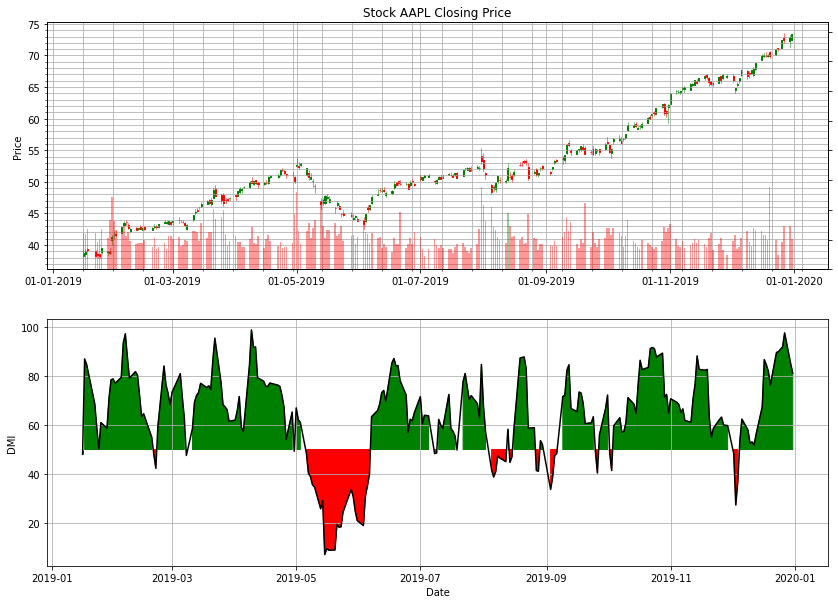

In [10]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['DMI'], label='Dynamic Momentum Index', color='k')
ax2.fill_between(df.index, y1=df['DMI'], y2=50, where=df['DMI']>50, color='green')
ax2.fill_between(df.index, y1=df['DMI'], y2=50, where=df['DMI']<50, color='red')
ax2.grid()
ax2.set_ylabel('DMI')
ax2.set_xlabel('Date')